Here I am conducting Hierarchyical Clustering

In [1]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
start_up=pd.read_csv('/content/50_Startups.csv')
start_up[0:4]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [3]:
#normalize the above data using z-test
def ztest(i):
  x=(i-i.mean())/i.std()
  return(x)

In [4]:
df_norm=start_up.drop('State',axis=1)
norm=ztest(df_norm)
norm[0:4]

,R&D Spend,Administration,Marketing Spend,Profit
0,1.996146,0.555117,2.132295,1.990990
1,1.936203,1.071924,1.904267,1.979335
2,1.736731,-0.720938,1.610180,1.960934
3,1.539157,-0.095396,1.407916,1.758771


In [5]:
norm['State']=start_up['State']
norm[0:4]

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.996146,0.555117,2.132295,1.990990,New York
1,1.936203,1.071924,1.904267,1.979335,California
2,1.736731,-0.720938,1.610180,1.960934,Florida
3,1.539157,-0.095396,1.407916,1.758771,New York


Text(0, 0.5, 'Euclidendistance')

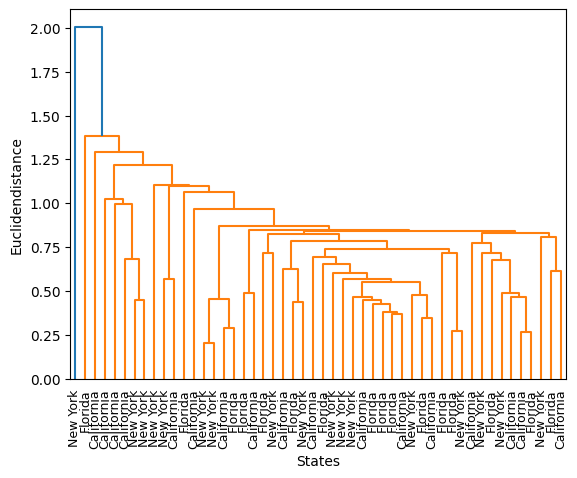

In [6]:
# Now we are going to create a dendogram
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(norm.drop('State',axis=1),method='single'),leaf_font_size=9,orientation='top',labels=np.array(norm['State']))
plt.xlabel('States')
plt.ylabel('Euclidendistance')

Text(0, 0.5, 'Euclidendistance')

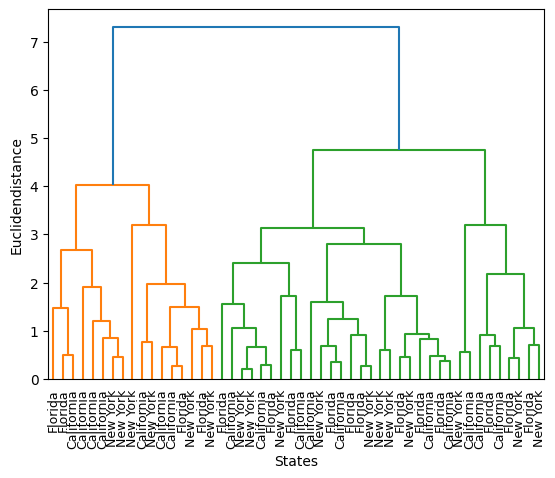

In [7]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(norm.drop('State',axis=1),method='complete'),leaf_font_size=9,orientation='top',labels=np.array(norm['State']))
plt.xlabel('States')
plt.ylabel('Euclidendistance')

Text(0, 0.5, 'Euclidendistance')

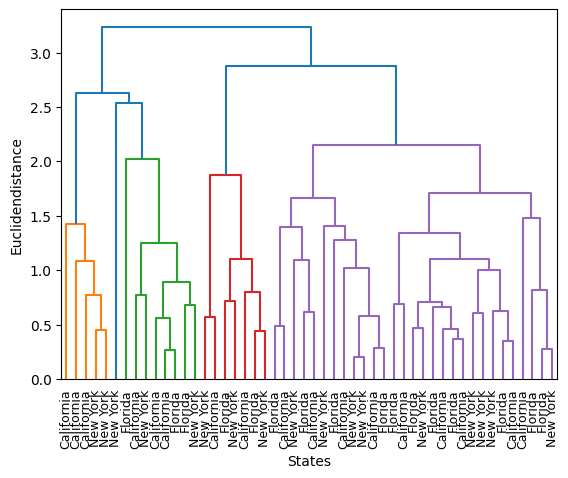

In [8]:
import matplotlib.pyplot as plt
dendogram=sch.dendrogram(sch.linkage(norm.drop('State',axis=1),method='average'),leaf_font_size=9,orientation='top',labels=np.array(norm['State']))
plt.xlabel('States')
plt.ylabel('Euclidendistance')

In [9]:
# Create a Cluster
hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [10]:
y_hc=hc.fit_predict(norm.drop('State',axis=1))
y_hc[0:3]

array([1, 1, 1])

In [11]:
norm['Clustered']=y_hc

In [12]:
norm[0:3]

,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
0,1.996146,0.555117,2.132295,1.990990,New York,1
1,1.936203,1.071924,1.904267,1.979335,California,1
2,1.736731,-0.720938,1.610180,1.960934,Florida,1


In [13]:
norm[norm['Clustered']==0][0:4]

,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
24,0.072380,-0.787474,-0.576091,-0.085858,New York,0
33,-0.397097,-0.652697,0.029518,-0.377950,Florida,0
35,-0.603622,-1.295505,-0.045036,-0.385378,New York,0
36,-0.981604,0.203855,-0.080941,-0.528565,Florida,0


In [14]:
norm[norm['Clustered']==1][0:4]

,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
0,1.996146,0.555117,2.132295,1.990990,New York,1
1,1.936203,1.071924,1.904267,1.979335,California,1
2,1.736731,-0.720938,1.610180,1.960934,Florida,1
3,1.539157,-0.095396,1.407916,1.758771,New York,1


In [15]:
norm[norm['Clustered']==2][0:4]

,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
6,1.326598,0.922779,-0.681234,1.094370,California,2
7,1.232543,0.863216,0.922817,1.085192,Florida,2
8,1.020013,0.977033,0.822536,0.997344,New York,2
12,0.438805,0.213284,0.317395,0.733706,Florida,2


In [16]:
norm.groupby('Clustered')[['R&D Spend','Administration','Marketing Spend','Profit']].mean()


,R&D Spend,Administration,Marketing Spend,Profit
Clustered,,,,
0,-1.053856,-0.676976,-0.661373,-1.006537
1,1.360791,-0.324153,1.199793,1.414762
2,0.236185,0.601082,0.018550,0.182428


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(norm.drop('State',axis=1),y_hc)

0.40048450213886594

In [18]:
# Create a Cluster
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='average')
hc


AgglomerativeClustering(linkage='average')

In [19]:
y_hc=hc.fit_predict(norm.drop('State',axis=1))
silhouette_score(norm.drop('State',axis=1),y_hc)

0.4324216011971764

K-mean Clustering


In [20]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
start_up=pd.read_csv('/content/50_Startups.csv')
start_up[0:4]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [22]:
#normalize the above data using z-test
def ztest(i):
  x=(i-i.mean())/i.std()
  return(x)

In [23]:
norm=ztest(start_up.drop('State',axis=1))
norm[0:4]

,R&D Spend,Administration,Marketing Spend,Profit
0,1.996146,0.555117,2.132295,1.990990
1,1.936203,1.071924,1.904267,1.979335
2,1.736731,-0.720938,1.610180,1.960934
3,1.539157,-0.095396,1.407916,1.758771


In [24]:
norm['State']=start_up['State']
norm[0:4]

,R&D Spend,Administration,Marketing Spend,Profit,State
0,1.996146,0.555117,2.132295,1.990990,New York
1,1.936203,1.071924,1.904267,1.979335,California
2,1.736731,-0.720938,1.610180,1.960934,Florida
3,1.539157,-0.095396,1.407916,1.758771,New York


In [25]:
df_norm=norm.drop('State',axis=1)

Elbow Chart

[195.99999999999994, 106.4905296370581, 78.66226463158544, 68.33834493863375, 55.486533844214904, 41.937909705129776, 37.15344860286428, 34.60351374302227, 31.64281935596536, 24.378395202672994]


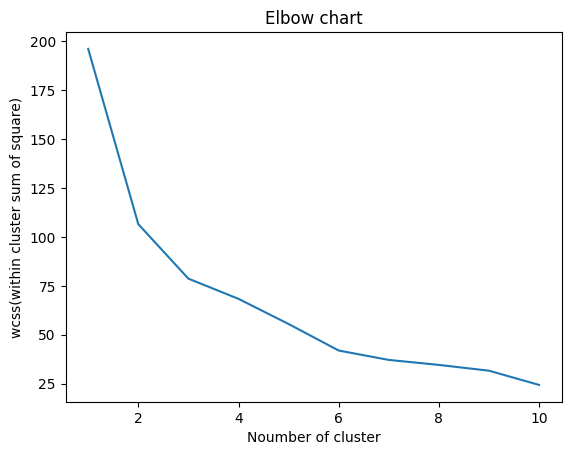

In [26]:
from sklearn.cluster import KMeans
#Within Cluster sum of square
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,random_state=0)
  kmean.fit(df_norm)
  wcss.append(kmean.inertia_)
print(wcss)


plt.plot(range(1,11),wcss)
plt.xlabel('Noumber of cluster')
plt.ylabel('wcss(within cluster sum of square)')
plt.title('Elbow chart')
plt.show()

In [27]:
#Building K-Mean cluster algorithem
model=KMeans(n_clusters=3,random_state=0)
model

KMeans(n_clusters=3, random_state=0)

In [28]:
model.fit(df_norm)

KMeans(n_clusters=3, random_state=0)

In [29]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1], dtype=int32)

In [30]:
# Creating the column of the clusters
norm['Clustered']=model.labels_

In [31]:
norm[0:10]

,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
0,1.996146,0.555117,2.132295,1.990990,New York,2
1,1.936203,1.071924,1.904267,1.979335,California,2
2,1.736731,-0.720938,1.610180,1.960934,Florida,2
3,1.539157,-0.095396,1.407916,1.758771,New York,2
4,1.489812,-1.069066,1.268648,1.344094,Florida,2
5,1.266937,-0.768437,1.241605,1.115920,New York,2
6,1.326598,0.922779,-0.681234,1.094370,California,2
7,1.232543,0.863216,0.922817,1.085192,Florida,2
8,1.020013,0.977033,0.822536,0.997344,New York,2
9,1.080846,-0.452051,0.768307,0.936514,California,2


In [32]:
norm[norm['Clustered']==0][0:10]


,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
24,0.072380,-0.787474,-0.576091,-0.085858,New York,0
33,-0.397097,-0.652697,0.029518,-0.377950,Florida,0
35,-0.603622,-1.295505,-0.045036,-0.385378,New York,0
37,-0.645974,-2.500606,-0.114446,-0.547397,California,0
38,-1.165346,-1.977197,-0.210646,-0.763743,New York,0
39,-0.766043,-1.369220,-0.294592,-0.769283,California,0
41,-0.998397,-1.307521,-0.380687,-0.848848,Florida,0
42,-1.091029,-0.897822,-0.515364,-1.005160,California,0
46,-1.577399,-0.197318,0.703975,-1.551174,Florida,0
48,-1.594248,-2.484188,-1.725608,-1.893983,New York,0


In [33]:
norm[norm['Clustered']==1][0:10]


,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
19,0.276633,1.148180,-1.725608,0.267061,New York,1
25,-0.197309,0.649891,-0.597451,-0.114332,California,1
26,0.035015,0.813459,-0.629445,-0.155785,Florida,1
28,-0.167096,2.187927,-0.759479,-0.216599,Florida,1
29,-0.176813,1.130974,-0.849509,-0.273109,New York,1
30,-0.255481,-0.203562,-0.980404,-0.299583,Florida,1
31,-0.274175,1.119191,-1.004224,-0.360468,New York,1
32,-0.224668,0.281070,-1.348756,-0.361850,California,1
34,-0.594645,1.297364,-0.001860,-0.379590,California,1
36,-0.981604,0.203855,-0.080941,-0.528565,Florida,1


In [34]:
norm[norm['Clustered']==2][0:10]


,R&D Spend,Administration,Marketing Spend,Profit,State,Clustered
0,1.996146,0.555117,2.132295,1.990990,New York,2
1,1.936203,1.071924,1.904267,1.979335,California,2
2,1.736731,-0.720938,1.610180,1.960934,Florida,2
3,1.539157,-0.095396,1.407916,1.758771,New York,2
4,1.489812,-1.069066,1.268648,1.344094,Florida,2
5,1.266937,-0.768437,1.241605,1.115920,New York,2
6,1.326598,0.922779,-0.681234,1.094370,California,2
7,1.232543,0.863216,0.922817,1.085192,Florida,2
8,1.020013,0.977033,0.822536,0.997344,New York,2
9,1.080846,-0.452051,0.768307,0.936514,California,2


In [35]:
model.cluster_centers_

array([[-0.87667752, -1.34695504, -0.31289774, -0.82287748],
       [-0.67045722,  0.64909138, -1.00069331, -0.67353824],
       [ 0.81225378,  0.12850368,  0.79750293,  0.79189111]])

In [36]:
start_up['clustered']=model.labels_
start_up[0:4]

,R&D Spend,Administration,Marketing Spend,State,Profit,clustered
0,165349.20,136897.80,471784.10,New York,192261.83,2
1,162597.70,151377.59,443898.53,California,191792.06,2
2,153441.51,101145.55,407934.54,Florida,191050.39,2
3,144372.41,118671.85,383199.62,New York,182901.99,2


In [37]:
start_up.drop('State',axis=1).groupby('clustered')[['R&D Spend','Administration','Marketing Spend','Profit']].mean()

,R&D Spend,Administration,Marketing Spend,Profit
clustered,,,,
0,33480.139000,83605.919000,172760.736000,78845.591000
1,42946.116250,139530.753750,88650.001875,84864.885625
2,111005.897083,124945.030417,308551.979167,143930.745000


In [38]:
from sklearn import metrics
metrics.silhouette_score(df_norm,model.labels_)

0.3665638567036597

In [39]:
# checking the silhoutscore for eandom cluster
for i in range(1,4):
  kmeans=KMeans(n_clusters=i,random_state=0)
  modle=model.fit(df_norm)
  labels=model.labels_
start_up['N_'+str(i)]=model.labels_
print(labels)
print('the silhout score for',i,'cluster is',metrics.silhouette_score(df_norm,model.labels_))
start_up

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 0 1 1 2 1 1 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 1 1 0 1 0 1]
the silhout score for 3 cluster is 0.3665638567036597


,R&D Spend,Administration,Marketing Spend,State,Profit,clustered,N_3
0,165349.20,136897.80,471784.10,New York,192261.83,2,2
1,162597.70,151377.59,443898.53,California,191792.06,2,2
2,153441.51,101145.55,407934.54,Florida,191050.39,2,2
3,144372.41,118671.85,383199.62,New York,182901.99,2,2
4,142107.34,91391.77,366168.42,Florida,166187.94,2,2
5,131876.90,99814.71,362861.36,New York,156991.12,2,2
6,134615.46,147198.87,127716.82,California,156122.51,2,2
7,130298.13,145530.06,323876.68,Florida,155752.60,2,2
8,120542.52,148718.95,311613.29,New York,152211.77,2,2
9,123334.88,108679.17,304981.62,California,149759.96,2,2


[195.99999999999994, 106.4905296370581, 78.66226463158544, 68.33834493863375, 55.486533844214904, 41.937909705129776, 37.15344860286428]


Text(0.5, 1.0, 'Elbow Chart to determine the optimum cluster')

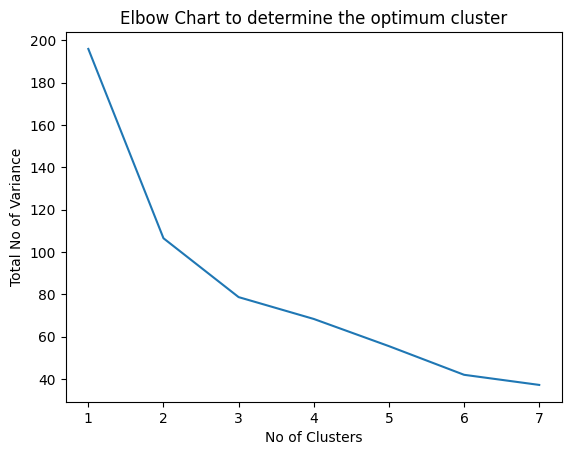

In [42]:
# determining onother opimum value of k
wcss=[]
for i in range(1,8):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit_transform(df_norm)
  wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,8),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('Total No of Variance')
plt.title('Elbow Chart to determine the optimum cluster')


In [47]:
#Creating the cluster algorithm
model=KMeans(n_clusters=3,random_state=0)
model

KMeans(n_clusters=3, random_state=0)

In [48]:
model.fit(df_norm)

KMeans(n_clusters=3, random_state=0)

In [56]:
x=model.labels_

In [57]:
from sklearn import metrics
metrics.silhouette_score(df_norm,x)

0.3665638567036597

DBSCAN(Density Based Clustering)

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn import metrics

In [62]:
df=pd.read_csv('/content/50_Startups.csv')
df[0:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [77]:
df.values

array([[165349.2, 136897.8, 471784.1, 'New York', 192261.83, 0],
       [162597.7, 151377.59, 443898.53, 'California', 191792.06, 0],
       [153441.51, 101145.55, 407934.54, 'Florida', 191050.39, 0],
       [144372.41, 118671.85, 383199.62, 'New York', 182901.99, 0],
       [142107.34, 91391.77, 366168.42, 'Florida', 166187.94, 0],
       [131876.9, 99814.71, 362861.36, 'New York', 156991.12, 0],
       [134615.46, 147198.87, 127716.82, 'California', 156122.51, 0],
       [130298.13, 145530.06, 323876.68, 'Florida', 155752.6, 0],
       [120542.52, 148718.95, 311613.29, 'New York', 152211.77, 0],
       [123334.88, 108679.17, 304981.62, 'California', 149759.96, 0],
       [101913.08, 110594.11, 229160.95, 'Florida', 146121.95, 0],
       [100671.96, 91790.61, 249744.55, 'California', 144259.4, 0],
       [93863.75, 127320.38, 249839.44, 'Florida', 141585.52, 0],
       [91992.39, 135495.07, 252664.93, 'California', 134307.35, 0],
       [119943.24, 156547.42, 256512.92, 'Florida', 132

In [66]:
standard=StandardScaler()
standard_df_noem=standard.fit_transform(df.drop('State',axis=1))

In [72]:
dbscan=DBSCAN(eps=3,min_samples=20)
dbscan

DBSCAN(eps=3, min_samples=20)

In [73]:
model=dbscan.fit(standard_df_noem)

In [74]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [76]:
df['Clustered']=model.labels_
df[0:10]

,R&D Spend,Administration,Marketing Spend,State,Profit,Clustered
0,165349.20,136897.80,471784.10,New York,192261.83,0
1,162597.70,151377.59,443898.53,California,191792.06,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0
3,144372.41,118671.85,383199.62,New York,182901.99,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0
5,131876.90,99814.71,362861.36,New York,156991.12,0
6,134615.46,147198.87,127716.82,California,156122.51,0
7,130298.13,145530.06,323876.68,Florida,155752.60,0
8,120542.52,148718.95,311613.29,New York,152211.77,0
9,123334.88,108679.17,304981.62,California,149759.96,0


In [80]:
for i in range(1,6):
 for j in range(5,21):
   df=pd.read_csv('/content/50_Startups.csv')
   df.drop('State',axis=1,inplace=True)
   data=df.values
   stand=StandardScaler()
   stand_df=stand.fit_transform(data)
   dbscn=DBSCAN(eps=i,min_samples=j)
   model=dbscn.fit(data)
   x=model.labels_
print('the E0 value',i,'the min values',j,)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)